## Nome: Felipe Silva Loschi
## Mátricula: 601
---

# Atividade 9 - Ajustes Não Lineares

## Objetivo da Atividade
Desenvolver a capacidade de ajustar dados experimentais a uma função exponencial e interpretar os parâmetros do modelo obtido.

## Contexto
Os dados a seguir representam o crescimento do número de seguidores de um influenciador em uma rede social após 𝑥 semanas:

| x (semanas) | 0 | 1 | 2 | 3  | 4  | 5  | 6  | 7  |
| ----- | - | - | - | -- | -- | -- | -- | -- |
| y     | 1 | 2 | 8 | 20 | 42 | 80 |178 |400 |

Encontre um modelo exponencial do tipo: $ y = a \times e^{bx} $

```
Dica:
A função `curve_fit()` do módulo scipy.optimize é usada para ajustar dados experimentais a um modelo matemático definido pelo usuário.

Ela recebe como entrada:
  - a função modelo (que descreve a relação esperada entre x e y, com parâmetros desconhecidos),
  - os valores medidos de x,
  - os valores medidos de y
```

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

1) Declare a função modelo

In [9]:
# Modelo exponencial
def modelo(x, a, b):
    return a * np.exp(b * x)

2) Declare os valores da tabela *(np.array)*

In [10]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([1, 2, 8, 20, 42, 80, 178, 400])

3) Ajuste com `curve_fit()`

In [11]:
param, conv = curve_fit(modelo, x, y)

4) Exiba os parametros ajustados no modelo

In [13]:
print(f"Parâmetros ajustados: a = {param[0]}, b = {param[1]}")

Parâmetros ajustados: a = 1.5519643254760613, b = 0.7927984841300489


5) Plote no Gráfico os pontos medidos e a reta ajustada

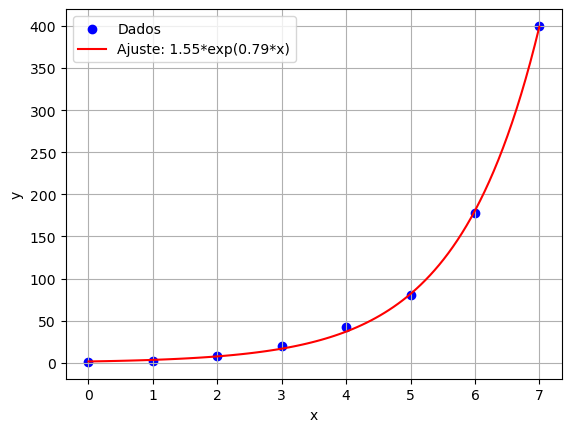

In [14]:
x_fit = np.linspace(0, 7, 100)
y_fit = modelo(x_fit, *param)

plt.scatter(x, y, label='Dados', color='blue')
plt.plot(x_fit, y_fit, label=f'Ajuste: {param[0]:.2f}*exp({param[1]:.2f}*x)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

6) Qual seria a previsão do modelo para o número de seguidores após 8 semanas?

*(Plote em um gráfico a curva ajustada junto com os dados reais e destaque o valor previsto).*

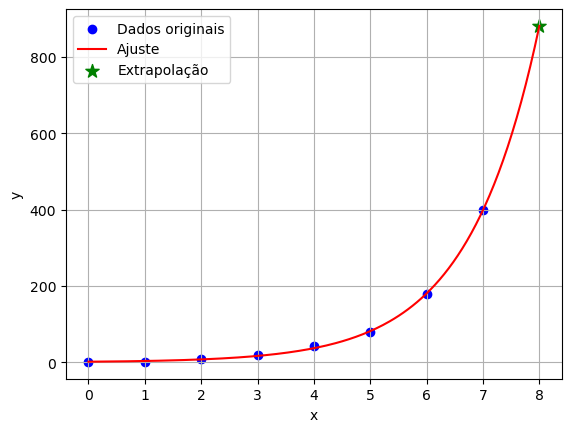

Valor extrapolado: [881.75065184]


In [21]:
x8 = param[0] * np.exp(param[1] * 8)

x_fit = np.linspace(0, 8, 200)
y_fit = modelo(x_fit, *param)

# Pontos extrapolados específicos
x_extra = np.array([8])
y_extra = modelo(x_extra, *param)

# Gráfico
plt.scatter(x, y, label='Dados originais', color='blue')
plt.plot(x_fit, y_fit, 'r-', label='Ajuste')
plt.scatter(x_extra, y_extra, label='Extrapolação', color='green', s=100, marker='*')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Valor extrapolado: {y_extra}")


7) O que significa o valor de 𝑏 em relação ao crescimento do número de seguidores?

**Resposta:** O parâmetro b representa a taxa de crescimento relativa pelo tempo. Se b for maior que 0, a função cresce exponencialmente, se for negativo, decresce exponencialmente.

8) O modelo ajustado representa bem os dados? Como podemos verificar isso visualmente no gráfico?

**Resposta:** O modelo ajustado se ajusta muito bem aos pontos. Isso se nota visualmente ao plotar o gráfico do modelo e ver a relação entre o modelo e os pontos, uma vez que o modelo passa quase perfeitamente por todos os pontos.